In [5]:
import numpy as np
import pandas as pd
import emoji
import re
import seaborn as sns
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

In [3]:
reddit_df = pd.read_csv('/Users/masonwasserman/Desktop/SML310/Final Project/reddit_wsb 2.csv')

In [7]:
ticker_df = pd.read_csv('/Users/masonwasserman/Desktop/SML310/nasdaq_screener_1620332139784.csv')
tickers = ticker_df['Symbol'].to_numpy()

In [8]:
pp_reddit_df = pd.read_csv('/Users/masonwasserman/Desktop/SML310/Final Project/pp_reddit.csv')
pp_reddit_df.fillna("", inplace=True)

In [10]:
# Create count vectorizers for pp data

# Uses a CountVectorizer to construct bag-of-words matrix of title column
vectorizer = CountVectorizer() # Add a comment about the max_features & ngram_range parameters
reddit_title_vocab = vectorizer.fit_transform(pp_reddit_df['title']).toarray()
reddit_title_vocab_df = pd.DataFrame(reddit_title_vocab, columns=vectorizer.get_feature_names())

# Uses a CountVectorizer to construct bag-of-words matrix of body column
vectorizer = CountVectorizer() # Add a comment about the max_features & ngram_range parameters
reddit_body_vocab = vectorizer.fit_transform(pp_reddit_df['body']).toarray()
reddit_body_vocab_df = pd.DataFrame(reddit_body_vocab, columns=vectorizer.get_feature_names())

In [11]:
counts = []
for ticker in tickers:
    tick = ticker.lower()
    title_sum = 0
    body_sum = 0
    if tick in reddit_title_vocab_df:
        title_sum = reddit_title_vocab_df[tick].sum()
    if tick in reddit_body_vocab_df:
        body_sum = reddit_body_vocab_df[tick].sum()
    counts.append(title_sum + body_sum)

ticker_df['Counts'] = counts

In [12]:
ticker_df.sort_values(['Counts'], axis=0, ascending=False).head(51)                                               

,Symbol,Name,Last Sale,Net Change,% Change,Market Cap,Country,IPO Year,Volume,Sector,Industry,Counts
3062,GME,GameStop Corporation Common Stock,$160.6776,1.1976,0.751%,1.137144e+10,United States,2002.0,2720265,Consumer Services,Electronics Distribution,22873
3099,GO,Grocery Outlet Holding Corp. Common Stock,$42.06,0.6400,1.545%,4.018913e+09,United States,2019.0,914438,Consumer Non-Durables,Specialty Foods,19679
6205,SEE,Sealed Air Corporation Common Stock,$56.92,0.0000,0.00%,8.721486e+09,United States,NaN,1434989,Basic Industries,Containers/Packaging,10075
5191,ONE,OneSmart International Education Group Limited...,$2.70,-0.1800,-6.25%,4.358203e+08,NaN,2018.0,109607,Miscellaneous,Service to the Health Industry,8874
379,AMC,AMC Entertainment Holdings Inc. Class A Common...,$9.07,-0.1000,-1.091%,4.084042e+09,NaN,2013.0,35669748,Consumer Services,Movies/Entertainment,7070
7424,WELL,Welltower Inc. Common Stock,$73.47,0.8200,1.129%,3.067523e+10,United States,NaN,847835,Consumer Services,Real Estate Investment Trusts,6747
5570,POST,Post Holdings Inc. Common Stock,$116.155,1.8350,1.605%,7.476609e+09,United States,2012.0,264653,Consumer Non-Durables,Specialty Foods,6263
4836,NEW,Puxin Limited American Depositary Shares each ...,$3.00,-0.1500,-4.762%,2.616810e+08,NaN,2018.0,370524,Miscellaneous,Service to the Health Industry,6038
2843,FUND,Sprott Focus Trust Inc. Common Stock,$8.4499,0.1809,2.188%,2.541547e+08,United States,NaN,119027,Finance,Investment Managers,5971
936,BIG,Big Lots Inc. Common Stock,$69.86,1.0300,1.496%,2.452190e+09,United States,NaN,376521,Consumer Services,Department/Specialty Retail Stores,5581


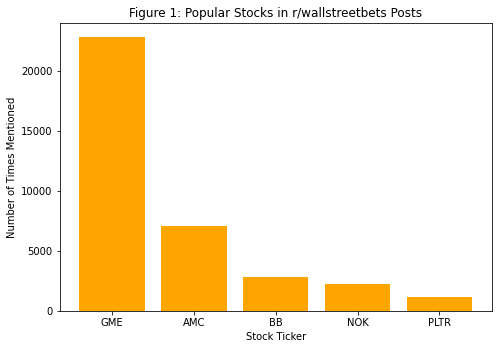

In [13]:
GME = ticker_df.loc[3062, 'Counts']
AMC = ticker_df.loc[379, 'Counts']
BB = ticker_df.loc[796, 'Counts']
NOK = ticker_df.loc[4949, 'Counts']
PLTR = ticker_df.loc[5523, 'Counts']

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
labels = ['GME', 'AMC', 'BB', 'NOK', 'PLTR']
vals = [GME, AMC, BB, NOK, PLTR]
ax.bar(labels,vals,color='orange')
plt.xlabel("Stock Ticker")
plt.ylabel("Number of Times Mentioned")
plt.title("Figure 1: Popular Stocks in r/wallstreetbets Posts")
plt.show()



## Lets try to perform simple sentiment analysis on the WSB reddit posts using VADER

In [14]:
# These function are used to preprocess and simplify the data
def simple_preprocess(text):
    text = text.replace('\n\n', ' ')  # get rid of new line markers
    text = re.sub(r'http\S+', '', text) # remove urls
    return text # join string back together and return

def simple_preprocess_df(df):
    idx1 = "title"
    idx2 = "body"
    length = len(df[idx1])
    for ii in range(length):
        text1 = str(df[idx1][ii])
        df.loc[ii, idx1] = simple_preprocess(text1)
        text2 = str(df[idx2][ii])
        df.loc[ii, idx2] = simple_preprocess(text2)
    return df


In [15]:
# Perform some simple preprocessing
simple_pp = reddit_df.copy()
simple_pp.fillna("", inplace=True) # fills any NaN values with empty strings
simple_pp = simple_preprocess_df(simple_pp)

In [241]:
type(simple_pp['body'][0])

str

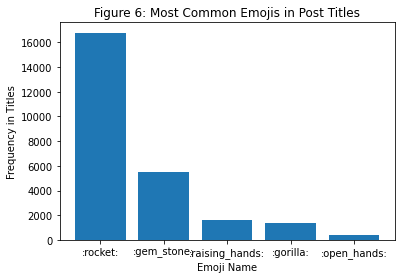

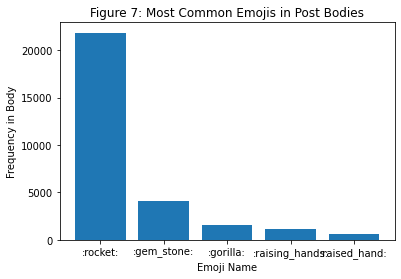

In [18]:
emoji_dict = {}
for string in reddit_df['title']:
    ls = emoji.emoji_lis(string)
    for item in ls:
        emote = item.get('emoji')
        if emote in emoji_dict:
            emoji_dict[emote] += 1
        else:
            emoji_dict[emote] = 1
        
sorted_emojis = dict(sorted(emoji_dict.items(), key=lambda item: item[1], reverse=True))
keys = [*sorted_emojis][:5]
keys = [emoji.demojize(emote) for emote in keys]
values = [*sorted_emojis.values()][:5]
plt.bar(keys, values)
plt.xlabel('Emoji Name')
plt.ylabel('Frequency in Titles')
plt.title('Figure 6: Most Common Emojis in Post Titles')
plt.show()

emoji_dict = {}
for string in simple_pp['body']:
    ls = emoji.emoji_lis(string)
    for item in ls:
        emote = item.get('emoji')
        if emote in emoji_dict:
            emoji_dict[emote] += 1
        else:
            emoji_dict[emote] = 1
        
sorted_emojis = dict(sorted(emoji_dict.items(), key=lambda item: item[1], reverse=True))
keys = [*sorted_emojis][:5]
keys = [emoji.demojize(emote) for emote in keys]
values = [*sorted_emojis.values()][:5]
plt.bar(keys, values)
plt.xlabel('Emoji Name')
plt.ylabel('Frequency in Body')
plt.title('Figure 7: Most Common Emojis in Post Bodies')
plt.show()

In [19]:
# Perform sentiment analysis

analyser = SentimentIntensityAnalyzer()
def sentiment_scores(sentence):
    snt = analyser.polarity_scores(sentence)['compound']
    return snt

title_scores = []

for title in simple_pp['title']:
    title_scores.append(sentiment_scores(title))

body_scores = []
for comment in simple_pp['body']:
    body_scores.append(sentiment_scores(comment))


In [20]:
# Get indices of negative and positive posts
simple_pp['title scores'] = title_scores
simple_pp['body scores'] = body_scores

positive_posts = simple_pp[simple_pp['title scores'] > 0.05]
negative_posts = simple_pp[simple_pp['title scores'] < -0.05]

positive_indices = positive_posts.index
negative_indices = negative_posts.index



In [21]:
# Get more preprocessed posts
pp_posts = pd.read_csv('/Users/masonwasserman/Desktop/SML310/Final Project/pp_reddit.csv').drop(['Unnamed: 0'], 
                                                                                                axis =1)
pp_posts.fillna("", inplace=True)

# Split these posts into positive and negative
pp_positivie = pp_posts.iloc[positive_indices]
pp_negative = pp_posts.iloc[negative_indices]

# Uses a CountVectorizer to construct bag-of-words matrix of title column of positive and negative posts

# Positive
vectorizer = CountVectorizer() # Add a comment about the max_features & ngram_range parameters
pp_positivie_title_vocab = vectorizer.fit_transform(pp_positivie['title']).toarray()
pp_positivie_title_vocab = pd.DataFrame(pp_positivie_title_vocab, columns=vectorizer.get_feature_names())

# Negative
vectorizer = CountVectorizer() # Add a comment about the max_features & ngram_range parameters
pp_negative_title_vocab = vectorizer.fit_transform(pp_negative['title']).toarray()
pp_negative_title_vocab = pd.DataFrame(pp_negative_title_vocab, columns=vectorizer.get_feature_names())

# Uses a CountVectorizer to construct bag-of-words matrix of body column of positive and negative posts

# Positive
vectorizer = CountVectorizer() # Add a comment about the max_features & ngram_range parameters
pp_positivie_body_vocab = vectorizer.fit_transform(pp_positivie['body']).toarray()
pp_positivie_body_vocab = pd.DataFrame(pp_positivie_body_vocab, columns=vectorizer.get_feature_names())

# Negative
vectorizer = CountVectorizer() # Add a comment about the max_features & ngram_range parameters
pp_negative_body_vocab = vectorizer.fit_transform(pp_negative['body']).toarray()
pp_negative_body_vocab = pd.DataFrame(pp_negative_body_vocab, columns=vectorizer.get_feature_names())


In [23]:
top_positivie_title = pp_positivie_title_vocab.sum().sort_values(ascending=False)
top_negative_title = pp_negative_title_vocab.sum().sort_values(ascending=False)

top_positivie_body = pp_positivie_body_vocab.sum().sort_values(ascending=False)
top_negative_body = pp_negative_body_vocab.sum().sort_values(ascending=False)

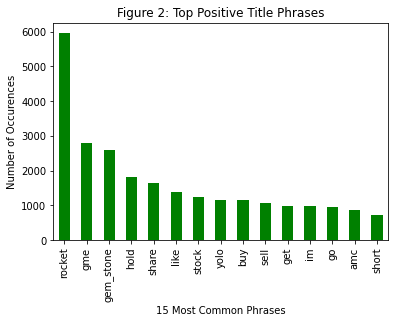

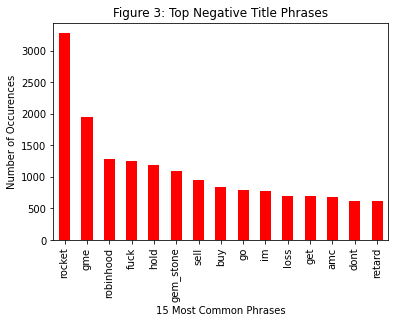

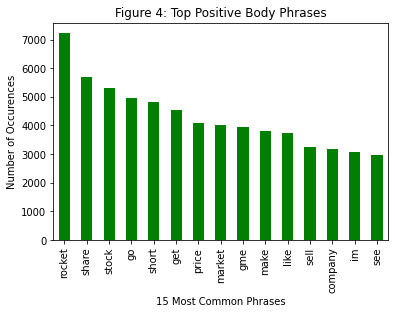

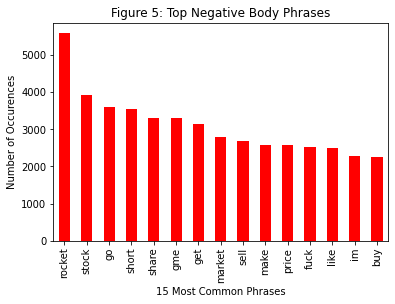

In [24]:
# Positive Title
top_positivie_title.head(15).plot.bar(color='g')
plt.xlabel("15 Most Common Phrases")
plt.ylabel("Number of Occurences")
plt.title("Figure 2: Top Positive Title Phrases")
plt.show()

# Negative Title
top_negative_title.head(15).plot.bar(color='r')
plt.xlabel("15 Most Common Phrases")
plt.ylabel("Number of Occurences")
plt.title("Figure 3: Top Negative Title Phrases")
plt.show()

# Positive Body
top_positivie_body.head(15).plot.bar(color='g')
plt.xlabel("15 Most Common Phrases")
plt.ylabel("Number of Occurences")
plt.title("Figure 4: Top Positive Body Phrases")
plt.show()     
    
# Negative Body
top_negative_body.head(15).plot.bar(color='r')
plt.xlabel("15 Most Common Phrases")
plt.ylabel("Number of Occurences")
plt.title("Figure 5: Top Negative Body Phrases")
plt.show()

           

In [97]:
simple_pp['Title Length'] = simple_pp['title'].str.len()
simple_pp['Body Length'] = simple_pp['body'].str.len()

In [154]:
score_nz = simple_pp['score'].to_numpy().nonzero()[0]
comms_num_nz = simple_pp['comms_num'].to_numpy().nonzero()[0]
body_nz = simple_pp['Body Length'].to_numpy().nonzero()[0]

score_comms = np.intersect1d(score_nz, comms_num_nz).tolist()
score_body = np.intersect1d(score_nz, body_nz).tolist()
comms_body = np.intersect1d(body_nz, comms_num_nz).tolist()


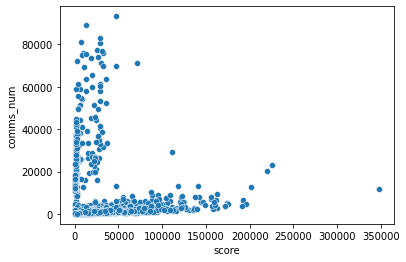

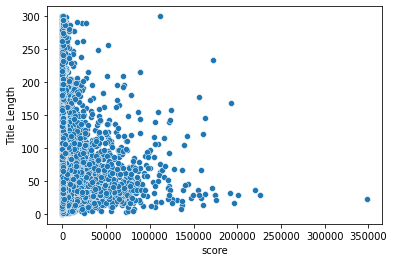

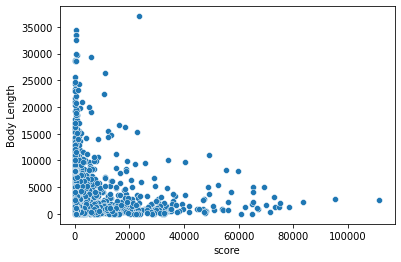

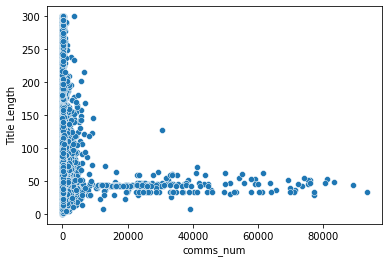

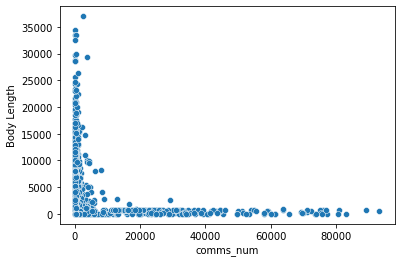

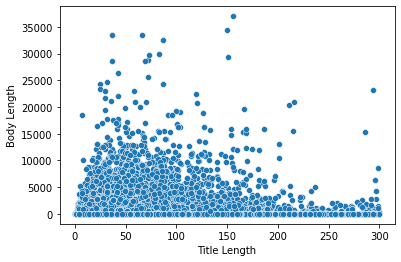

In [157]:
sns.scatterplot(x=simple_pp.iloc[score_comms]['score'], y=simple_pp.iloc[score_comms]['comms_num'])
plt.show()

sns.scatterplot(x=simple_pp[simple_pp['score'] > 0]['score'], y=simple_pp[simple_pp['score'] > 0]['Title Length'])
plt.show()

sns.scatterplot(x=simple_pp.iloc[score_body]['score'], y=simple_pp.iloc[score_body]['Body Length'])
plt.show()

sns.scatterplot(x=simple_pp['comms_num'], y=simple_pp['Title Length'])
plt.show()

sns.scatterplot(x=simple_pp['comms_num'], y=simple_pp['Body Length'])
plt.show()

sns.scatterplot(x=simple_pp['Title Length'], y=simple_pp['Body Length'])
plt.show()